In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

### __Problem 13.2__

In [2]:
data_132 = {
    "Household": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    "Income": [38000,51200,39600,43400,47700,53000,41500,40800,45400,52400,38700,40100,49500,38000,42000,54000,51700,39400,40900,52800],
    "Home Ownership Status": [0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1]
}
df_132 = pd.DataFrame(data_132)
df_132_subset = df_132.sample(n=15, random_state=42).reset_index(drop=True)
df_132_subset

,Household,Income,Home Ownership Status
0,1,38000,0
1,18,39400,0
2,16,54000,1
3,2,51200,1
4,9,45400,1
5,6,53000,0
6,12,40100,0
7,4,43400,1
8,19,40900,0
9,17,51700,1


Linear Model

In [3]:
X = df_132_subset["Income"].values/1000  # Scale income for better numerical stability
y = df_132_subset["Home Ownership Status"].values

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

log_reg_linear = sm.Logit(y, X_b).fit()
print(log_reg_linear.summary())

Optimization terminated successfully.
         Current function value: 0.439924
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.3633
Time:                        20:50:25   Log-Likelihood:                -6.5989
converged:                       True   LL-Null:                       -10.364
Covariance Type:            nonrobust   LLR p-value:                  0.006068
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5145      6.093     -2.218      0.027     -25.457      -1.572
x1             0.2899      0.

Quadratic Model

In [4]:
X = df_132_subset["Income"].values/1000  # Scale income for better numerical stability
y = df_132_subset["Home Ownership Status"].values

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X, X**2]

log_reg_quad = sm.Logit(y, X_b).fit()
print(log_reg_quad.summary())

Optimization terminated successfully.
         Current function value: 0.388890
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   15
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.4371
Time:                        20:50:25   Log-Likelihood:                -5.8334
converged:                       True   LL-Null:                       -10.364
Covariance Type:            nonrobust   LLR p-value:                   0.01078
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -115.2843     94.748     -1.217      0.224    -300.987      70.418
x1             4.7019      4.

In [5]:
# Residual Deviance for Linear Model
deviance_linear = -2*(y @ np.log(log_reg_linear.predict()) + (1 - y) @ np.log(1 - log_reg_linear.predict()))
p_value_linear = 1 - chi2.cdf(deviance_linear, 13)
print(f"Residual Deviance (Linear Model): {deviance_linear}")
print(f"P-value (Linear Model): {p_value_linear}")

print("--------------------------------------------------")
# Residual Deviance for Quadratic Model
deviance_quad = -2*(y @ np.log(log_reg_quad.predict()) + (1 - y) @ np.log(1 - log_reg_quad.predict()))
p_value_quad = 1 - chi2.cdf(deviance_quad, 12)
print(f"Residual Deviance (Quadratic Model): {deviance_quad}")
print(f"P-value (Quadratic Model): {p_value_quad}")

print("--------------------------------------------------")
# Likelihood Ratio Test
G2 = deviance_linear - deviance_quad
p_value = 1 - chi2.cdf(G2, 1)
print(f"Likelihood Ratio Test Statistic (G^2): {G2}")
print(f"P-value: {p_value}")

Residual Deviance (Linear Model): 13.197708864059512
P-value (Linear Model): 0.43265874085197487
--------------------------------------------------
Residual Deviance (Quadratic Model): 11.666702060369367
P-value (Quadratic Model): 0.472804713322316
--------------------------------------------------
Likelihood Ratio Test Statistic (G^2): 1.5310068036901452
P-value: 0.21596140433607114


### __Problem 13.4__

In [6]:
data_134 = {
    "Index": [1,2,3,4,5,6,7,8,9,10,11],
    "Discount_x": [5,7,9,11,13,15,17,19,21,23,25],
    "Sample_size_n": [500,500,500,500,500,500,500,500,500,500,500],
    "Number_redeemed_r": [100,122,147,176,211,244,277,310,343,372,391]
}
df_134 = pd.DataFrame(data_134).sample(n=8, random_state=42).reset_index(drop=True)
df_134

,Index,Discount_x,Sample_size_n,Number_redeemed_r
0,6,15,500,244
1,1,5,500,100
2,10,23,500,372
3,11,25,500,391
4,3,9,500,147
5,2,7,500,122
6,9,21,500,343
7,5,13,500,211


Linear Model

In [7]:
X = df_134["Discount_x"].values
y = df_134["Number_redeemed_r"].values/df_134["Sample_size_n"].values

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

log_reg_linear134 = sm.Logit(y, X_b).fit()
print(log_reg_linear134.summary())

Optimization terminated successfully.
         Current function value: 0.514873
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.2537
Time:                        20:50:25   Log-Likelihood:                -4.1190
converged:                       True   LL-Null:                       -5.5192
Covariance Type:            nonrobust   LLR p-value:                   0.09424
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0789      1.904     -1.092      0.275      -5.811       1.653
x1             0.1356      0.

In [8]:
# Residual Deviance for Linear Model
deviance_linear_134 = -2*(y @ np.log(log_reg_linear134.predict()) + (1 - y) @ np.log(1 - log_reg_linear134.predict()))
p_value_linear_134 = 1 - chi2.cdf(deviance_linear_134, 6)
print(f"Residual Deviance (Linear Model): {deviance_linear_134}")
print(f"P-value (Linear Model): {p_value_linear_134}")

Residual Deviance (Linear Model): 9.502453255238848
P-value (Linear Model): 0.14722950519989964


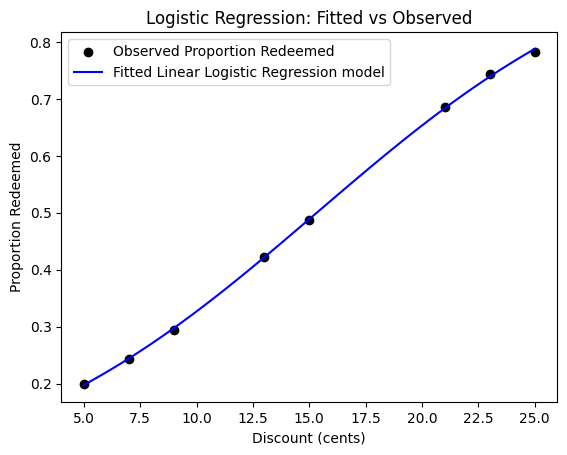

In [9]:
# Observed data
X = df_134["Discount_x"].values
y = df_134["Number_redeemed_r"].values / df_134["Sample_size_n"].values

# Fitted curve
x_vals_linear = np.linspace(5, 25, 100)
y_hat_linear = np.exp(log_reg_linear134.params[0] + log_reg_linear134.params[1] * x_vals_linear) / (
    1 + np.exp(log_reg_linear134.params[0] + log_reg_linear134.params[1] * x_vals_linear)
)

plt.scatter(X, y, color="black", label="Observed Proportion Redeemed")
plt.plot(x_vals_linear, y_hat_linear, color="blue", label="Fitted Linear Logistic Regression model")
plt.xlabel("Discount (cents)")
plt.ylabel("Proportion Redeemed")
plt.legend()
plt.title("Logistic Regression: Fitted vs Observed")
plt.show()

Quadratic Model

In [10]:
X = df_134["Discount_x"].values
y = df_134["Number_redeemed_r"].values/df_134["Sample_size_n"].values

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X, X**2]

log_reg_quad134 = sm.Logit(y, X_b).fit()
print(log_reg_quad134.summary())

Optimization terminated successfully.
         Current function value: 0.514876
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.2537
Time:                        20:50:25   Log-Likelihood:                -4.1190
converged:                       True   LL-Null:                       -5.5192
Covariance Type:            nonrobust   LLR p-value:                    0.2465
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0846      4.501     -0.463      0.643     -10.906       6.737
x1             0.1365      0.

In [11]:
# Residual Deviance for Quadratic Model
deviance_quad_134 = -2*(y @ np.log(log_reg_quad134.predict()) + (1 - y) @ np.log(1 - log_reg_quad134.predict()))
p_value_quad_134 = 1 - chi2.cdf(deviance_quad_134, 6)
print(f"Residual Deviance (Quadratic Model): {deviance_quad_134}")
print(f"P-value (Quadratic Model): {p_value_quad_134}")

Residual Deviance (Quadratic Model): 9.502451281107305
P-value (Quadratic Model): 0.14722960147106


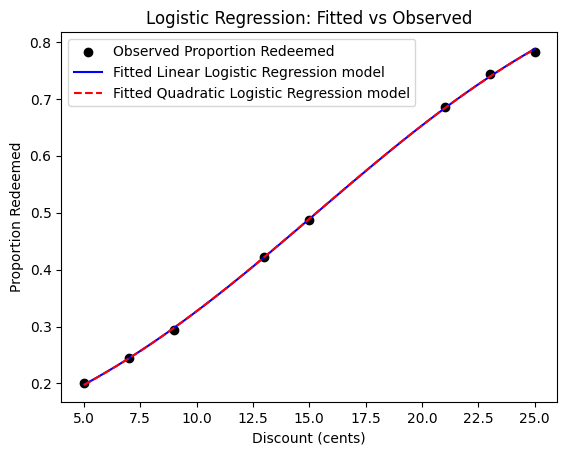

In [12]:
# Observed data
X = df_134["Discount_x"].values
y = df_134["Number_redeemed_r"].values / df_134["Sample_size_n"].values

# Fitted curve
x_vals_quad = np.linspace(5, 25, 100)
y_hat_quad = np.exp(log_reg_quad134.params[0] + log_reg_quad134.params[1] * x_vals_quad + log_reg_quad134.params[2] * x_vals_quad**2) / (
    1 + np.exp(log_reg_quad134.params[0] + log_reg_quad134.params[1] * x_vals_quad + log_reg_quad134.params[2] * x_vals_quad**2)
)

plt.scatter(X, y, color="black", label="Observed Proportion Redeemed")
plt.plot(x_vals_linear, y_hat_linear, color="blue", label="Fitted Linear Logistic Regression model")
plt.plot(x_vals_quad, y_hat_quad, color="red", linestyle="--", label="Fitted Quadratic Logistic Regression model")
plt.xlabel("Discount (cents)")
plt.ylabel("Proportion Redeemed")
plt.legend()
plt.title("Logistic Regression: Fitted vs Observed")
plt.show()

Likehood-ratio test

In [13]:
# Residual Deviance for Linear Model
deviance_linear = -2*(y @ np.log(log_reg_linear134.predict()) + (1 - y) @ np.log(1 - log_reg_linear134.predict()))
p_value_linear = 1 - chi2.cdf(deviance_linear, 6)
print(f"Residual Deviance (Linear Model): {deviance_linear}")
print(f"P-value (Linear Model): {p_value_linear}")

print("--------------------------------------------------")
# Residual Deviance for Quadratic Model
deviance_quad = -2*(y @ np.log(log_reg_quad134.predict()) + (1 - y) @ np.log(1 - log_reg_quad134.predict()))
p_value_quad = 1 - chi2.cdf(deviance_quad, 6)
print(f"Residual Deviance (Quadratic Model): {deviance_quad}")
print(f"P-value (Quadratic Model): {p_value_quad}")

print("--------------------------------------------------")
# Likelihood Ratio Test
G2 = deviance_linear - deviance_quad
p_value = 1 - chi2.cdf(G2, 1)
print(f"Likelihood Ratio Test Statistic (G^2): {G2}")
print(f"P-value: {p_value}")

Residual Deviance (Linear Model): 9.502453255238848
P-value (Linear Model): 0.14722950519989964
--------------------------------------------------
Residual Deviance (Quadratic Model): 9.502451281107305
P-value (Quadratic Model): 0.14722960147106
--------------------------------------------------
Likelihood Ratio Test Statistic (G^2): 1.9741315426813344e-06
P-value: 0.9988789423091048


Wald Statistics

In [14]:
# Wald Statistics
beta_hat = log_reg_quad134.params
X = np.c_[np.ones((X.shape[0], 1)), df_134["Discount_x"].values, df_134["Discount_x"].values**2]
n = df_134["Sample_size_n"].values

# Compute fitted probabilities
eta = X @ beta_hat
p = np.exp(eta) / (1 + np.exp(eta))
 
# Construct diagonal weight matrix
W = np.diag(n * p * (1 - p))

# Compute covariance matrix of beta_hat
cov_beta = np.linalg.inv(X.T @ W @ X)

# Standard errors
se_beta = np.sqrt(np.diag(cov_beta))

# Wald z-statistics
z_stats = beta_hat / se_beta

# Two-sided p-values (using standard normal)
p_values = 2 * (1 - norm.cdf(np.abs(z_stats)))

print("Estimates:", beta_hat)
print("Std Errors:", se_beta)
print("z-values:", z_stats)
print("p-values:", p_values)

Estimates: [-2.08458063e+00  1.36547524e-01 -3.09326355e-05]
Std Errors: [0.20128073 0.03034034 0.00098457]
z-values: [-10.35658338   4.50052712  -0.03141731]
p-values: [0.00000000e+00 6.77851554e-06 9.74936738e-01]


95% Confidence Intervals

In [15]:
for i in range(len(beta_hat)):
    ci_lower = beta_hat[i] - 1.96 * se_beta[i]
    ci_upper = beta_hat[i] + 1.96 * se_beta[i]
    print(f"95% CI for beta_{i}: ({ci_lower}, {ci_upper})")

95% CI for beta_0: (-2.479090858959416, -1.6900704087445682)
95% CI for beta_1: (0.07708045706511733, 0.1960145906172115)
95% CI for beta_2: (-0.0019606958341610303, 0.0018988305632068978)


### __Problem 13.6__

In [16]:
data_136 = {
    "Valve": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "Number of Failures": [5,3,0,1,4,0,0,1,0,0,0,1,0,7,0],
    "Months": [18,15,11,14,23,10,5,8,7,12,3,7,2,30,9]
}
df_136 = pd.DataFrame(data_136).sample(n=6, random_state=42).reset_index(drop=True)
df_136

,Valve,Number of Failures,Months
0,10,0,12
1,12,1,7
2,1,5,18
3,14,7,30
4,6,0,10
5,9,0,7


In [17]:
X = df_136["Months"].values
y = df_136["Number of Failures"].values
X_b = np.c_[np.ones((X.shape[0], 1)), X]
poisson_reg = sm.GLM(y, X_b, family=sm.families.Poisson()).fit()
print(poisson_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.7836
Date:                Tue, 11 Nov 2025   Deviance:                       8.2789
Time:                        20:50:25   Pearson chi2:                     7.35
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9173
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4094      0.804     -1.753      0.0

In [18]:
# Model Deviance
deviance_poisson = poisson_reg.deviance
p_value_poisson = 1 - chi2.cdf(deviance_poisson, poisson_reg.df_resid)
print(f"Model Deviance: {deviance_poisson}")
print(f"P-value: {p_value_poisson}")

Model Deviance: 8.278948905422912
P-value: 0.08187810803404028


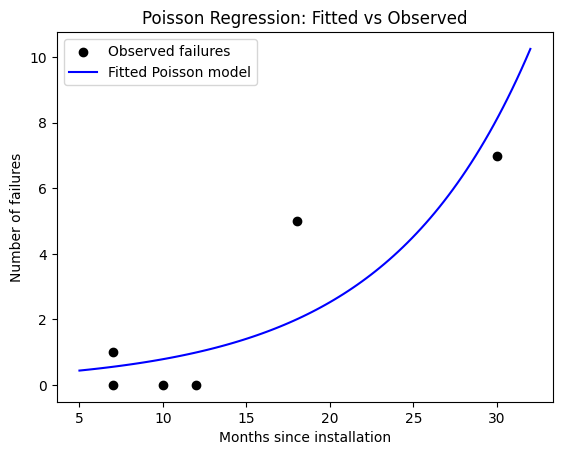

In [19]:
# Observed data
x = df_136['Months']
y = df_136['Number of Failures']

# Fitted curve
x_vals = np.linspace(5, 32, 100)
y_hat = np.exp(poisson_reg.params[0] + poisson_reg.params[1] * x_vals)

plt.scatter(x, y, color='black', label='Observed failures')
plt.plot(x_vals, y_hat, color='blue', label='Fitted Poisson model')
plt.xlabel('Months since installation')
plt.ylabel('Number of failures')
plt.legend()
plt.title('Poisson Regression: Fitted vs Observed')
plt.show()